<a href="https://colab.research.google.com/github/Philngtn/Panda_tuts/blob/main/PandaTuts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating DataFrame**

In [ ]:
import pandas as pd
import numpy as np


arr_2 = np.random.randint(10,50, size=(2,3))
df_1 = pd.DataFrame(arr_2, ['A', 'B'], ['C','D','E'])

df_1

,C,D,E
A,43,31,23
B,35,49,20


In [ ]:
dict_3 = {'one': pd.Series([1.,2.,3.], index=['a','b','c']), 
          'two': pd.Series([1.,2.,3.,4.], index=['a','b','c','d'])}

df_2 = pd.DataFrame(dict_3)
df_2


,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:

pd.DataFrame.from_dict(dict([('A',[1,2,3]),('B',[4,5,6])]))


,A,B
0,1,4
1,2,5
2,3,6


In [ ]:
pd.DataFrame.from_dict(dict([('A',[1,2,3]),('B',[4,5,6])]), orient='index', columns=['one', 'two', 'three'])

,one,two,three
A,1,2,3
B,4,5,6


**Editing and Retrieving Data**

In [ ]:
print("This is DF 1:")
print(df_1)
print(" ")
df_1[['C','E']] # Take only 2 Column C and E and ALL row
df_1.loc['A'] # Take row A
df_1.iloc[1] # Take row 1 ('A')
df_1.loc[['A','B'],['D','E']] # Take specific ROW and COL
df_1['Total'] = df_1['C'] + df_1['E'] + df_1['D']
print("This is DF 2:")
print(df_2)
print(" ")
df_2['Mul'] = df_2['one'] * df_2['two']

print("Adding new row to DF")
dict_2 = {'C': 44, 'D':45, 'E':46}
new_row = pd.Series(dict_2, name = 'F')
df_1 = df_1.append(new_row)
print(df_1)
print(" ")

print("Drop a column:")
df_1.drop('Total', axis=1, inplace=True)
print(df_1)
print(" ")

print("Drop a row:")
df_1.drop('B', axis=0, inplace=True)
print(df_1)
print(" ")

print("Modify the indexes:")
df_1['Sex'] = ['Men','Women']
df_1.set_index('Sex',inplace=True)
print(df_1)
print(" ")
# df_1.reset_index(inplace=True)
df_2.assign(Div=df_2['one']/df_2['two'])
# Second way to add column
df_2.assign(Div=lambda x: (x['one']/ x['two']))

This is DF 1:
    C   D   E
A  43  31  23
B  35  49  20
 
This is DF 2:
   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
 
Adding new row to DF
      C     D     E  Total
A  43.0  31.0  23.0   97.0
B  35.0  49.0  20.0  104.0
F  44.0  45.0  46.0    NaN
 
Drop a column:
      C     D     E
A  43.0  31.0  23.0
B  35.0  49.0  20.0
F  44.0  45.0  46.0
 
Drop a row:
      C     D     E
A  43.0  31.0  23.0
F  44.0  45.0  46.0
 
Modify the indexes:
          C     D     E
Sex                    
Men    43.0  31.0  23.0
Women  44.0  45.0  46.0
 


,one,two,Mul,Div
a,1.0,1.0,1.0,1.0
b,2.0,2.0,4.0,1.0
c,3.0,3.0,9.0,1.0
d,NaN,4.0,NaN,NaN


In [ ]:
# Remove np.nan in DF
df_3 = pd.DataFrame({'A':[1.,np.nan, 3., np.nan]})
df_4 = pd.DataFrame({'A':[1., 9., 2., 4.]})
df_3.combine_first(df_4)

,A
0,1.0
1,9.0
2,3.0
3,4.0


**Conditional Selection**

In [ ]:
arr_2 = np.random.randint(10,50, size=(2,3))
df_1 = pd.DataFrame(arr_2, ['A','B'], ['C','D','E'])
print(df_1)
print(" ")
# gt lt le eq ne ge
print("Greater than 40 \n", df_1.gt(40.0))
print(" ")
bool_1 = df_1 >= 45.0
df_1[bool_1]
df_1['E'] > 40
# Return a row if a column matches the condition (show row which has column E gt 30)
# We stack up DF
df_1[df_1['E'] > 30]

# Take the value at the column C of the DF has the row where its column E's value gt 30
df_2 = df_1[df_1['E']>30]
df_2['C'] 
# Take the value at the colum C, D of the DF which has the row where its column E's value gt 20

print(df_1[df_1['E']> 20][['C','D']])
print(" ")
arr_3 = np.array([[1,2,3],[4,5,6],[7,8,9]])
df_2 = pd.DataFrame(arr_3, ['A', 'B', 'C'], ['X','Y','Z'])
print(df_2)
print(" ")
# Take the row where its value in column X less 7 and greater than 3
df_2[(df_2['X']>3) & (df_2['X']<7)]

    C   D   E
A  49  19  46
B  17  22  35
 
Greater than 40 
        C      D      E
A   True  False   True
B  False  False  False
 
    C   D
A  49  19
B  17  22
 
   X  Y  Z
A  1  2  3
B  4  5  6
C  7  8  9
 


,X,Y,Z
B,4,5,6


In [ ]:
df_5 = pd.DataFrame({'id':[1,2,3,4,5,6], 'Name':['John','sd', 'Son','Mai','Lam','Cuc'], 
                     'Valid':[True, False,True, False,False,True]})
df_6 = pd.DataFrame({'id':[1,2,3,4,5,6], 'Pass':['213','w', 'Ssdon','Maggi','Lytam','Cbuc']})

print(df_5)
print("")
print(df_6)
print("")
df_7 = df_6[df_6['id'] == df_5['id']][['Pass']]
print(df_7)
print("")
df_5.drop('Valid', axis=1, inplace=True)
print(df_5)
print("")
df_5['Pass']=df_7
print(df_5)
print("")

**File INPUT/OUTPUT**

In [ ]:
!pip install pymysql

     |████████████████████████████████| 43 kB 919 kB/s 


In [ ]:
import pymysql
import numpy as np
import pandas as pd

cs_df = pd.read_csv('ComputerSales.csv')
cs_df[:6:2]


dict_3 = {'one':pd.Series([1.,2.,3.], index=list('abc')), 'two':pd.Series([1.,2.,3.,4.], index=list('abcd'))}
df_2 = pd.DataFrame(dict_3)
df_2

print(df_2.fillna(0,inplace=True))
print(df_2)

row = df_2.iloc[1]
# Adding value of row 1 to the whole DF
df_2.add(row, axis='columns')
df_2.empty

df_5 = pd.DataFrame({'A':range(3), 'B':range(1,4)})
df_5.transform([lambda x: x**2, lambda x:x**3])

df_5.transform({'A':lambda x:x**2, 'B':lambda x:x**3})
df_5.applymap(lambda x:x**2)

# Total number of unique 
df_2['two'].nunique()

df_2['two'].value_counts()
df_2.columns

df_2.isnull()

**Group Data**

In [ ]:
dict_5 = {'Store':[1,2,1,2], 'Flavor':['Choc','Van','Straw','Choc'],
          'Sale': [26,12,18,22]}

df_11 = pd.DataFrame(dict_5) 

by_store = df_11.groupby('Store')
by_store.mean()
by_store.sum().loc[1]
by_store.describe()

Sale                                              
      count  mean       std   min   25%   50%   75%   max
Store                                                    
1       2.0  22.0  5.656854  18.0  20.0  22.0  24.0  26.0
2       2.0  17.0  7.071068  12.0  14.5  17.0  19.5  22.0

**Concatenate Merge and Join Data**

In [ ]:
df_12 = pd.DataFrame({'A': [1,2,3], 
                      'B': [4,5,6]},
                      index=[1,2,3])
df_13 = pd.DataFrame({'A': [7,8,9], 
                      'B': [10,11,12]},
                      index=[1,2,3])

pd.concat([df_12,df_13])

df_12 = pd.DataFrame({'A': [1,2,3], 
                      'B': [4,5,6],
                      'key':[1,2,3]})
df_13 = pd.DataFrame({'A': [7,8,9], 
                      'B': [10,11,12],
                      'key':[1,2,3]})


pd.merge(df_12, df_13, how='inner', on='key')

df_12 = pd.DataFrame({'A': [1,2,3], 
                      'B': [4,5,6]},
                      index=[1,2,3])
df_13 = pd.DataFrame({'C': [7,8,9], 
                      'D': [10,11,12]},
                      index=[1,4,5])

df_12.join(df_13, how='outer')



,A,B,C,D
1,1.0,4.0,7.0,10.0
2,2.0,5.0,NaN,NaN
3,3.0,6.0,NaN,NaN
4,NaN,NaN,8.0,11.0
5,NaN,NaN,9.0,12.0


**Statistics**

In [ ]:
ics_df = pd.read_csv('icecreamsales.csv')
ics_df
# See howmany obs
ics_df.count()

# Sum the value
ics_df.sum(skipna=True)
print(ics_df)
ics_df['Sales'].cumsum()


**Iteration**

In [ ]:
ser_7 = pd.Series(range(5), index=list('abcde'))
arr_4 = np.random.randint(10,50, size=(2,3))
df_8 = pd.DataFrame(arr_4, list('BC'),list('CDE'))
print(df_8)
print()

# for col in ser_7:
#   print(col)

for label, ser in df_8.items():
  print(label)
  print(ser)

print()

for index, row in df_8.iterrows():
  print(f"{index}\n{row}")

print()

for row in df_8.itertuples():
  print(row)

    C   D   E
B  28  30  16
C  22  29  35

C
B    28
C    22
Name: C, dtype: int64
D
B    30
C    29
Name: D, dtype: int64
E
B    16
C    35
Name: E, dtype: int64

B
C    28
D    30
E    16
Name: B, dtype: int64
C
C    22
D    29
E    35
Name: C, dtype: int64

Pandas(Index='B', C=28, D=30, E=16)
Pandas(Index='C', C=22, D=29, E=35)


**SORTING**

In [ ]:
print(df_8)
df_8.sort_index(ascending=False)
df_8.sort_values(by='D')

**Manipulate Function**

In [ ]:
import sys
import pandas as pd
import numpy as np

cs_df = pd.read_csv("ComputerSales.csv")

def get_profit_total(df):
  prof_ser = df['Profit']
  print(f"Total Profit : {prof_ser.sum()}")

get_profit_total(cs_df)

def split_name(df):
  def get_names(full_name):
    f_name, l_name = full_name.split()
    return pd.Series(
        (f_name,l_name), index=(['First Name','Last Name'])
    )

  names = df['Contact'].apply(get_names)
  df[names.columns] = names
  return df

split_name(cs_df).head()

def create_age_groups(df):
  bins = [0, 30, 50, sys.maxsize]
  labels = ['<30','30-50','>50']
  age_group = pd.cut(df['Age'], bins=bins, labels=labels)
  df['Age Group'] = age_group
  return df

create_age_groups(cs_df).head()

cs_df.pipe(split_name).pipe(create_age_groups).head()


**Aligning, Reindexing, and Renameing Labels**

In [ ]:
import sys
import pandas as pd
import numpy as np

ser_6 = pd.Series(range(5), index=list('abcde'))
sl_1 = ser_6[:4]
sl_2 = ser_6[1:]
print(sl_1)
print(sl_2)
print()
sl_1.align(sl_2, join='inner')

# Renaming
arr_3 = np.random.randint(10,50, size=(2,3))
df_6 = pd.DataFrame(arr_3, ['A','B'], ['C','D','E'])
print(df_6)
df_6['Sex'] = ['Man','Woman']
df_6.set_index('Sex', inplace=True)

df_6.rename(columns={'C':'CHICKENS', 'D':'DUCKS','E':'DOGS'})

a    0
b    1
c    2
d    3
dtype: int64
b    1
c    2
d    3
e    4
dtype: int64

    C   D   E
A  39  48  42
B  37  42  39


,CHICKENS,DUCKS,DOGS
Sex,,,
Man,39,48,42
Woman,37,42,39


**MultiIndex**

In [ ]:
days = ['Day 1', 'Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 2' ]
meals = [1,2,3,1,2,3]
hier_index = list(zip(days,meals))
# Create a tuble 
# print(hier_index)

hier_index = pd.MultiIndex.from_tuples(hier_index)
arr_5 = np.random.randint(400, 700, size=(6,1))
arr_6 = np.random.randint(100, 200, size=(6,1))

df_9 = pd.DataFrame(np.concatenate([arr_5,arr_6], axis=1), hier_index, ['Man', 'Woman'])
print(df_9)

df_9.loc['Day 2'].loc[2]['Woman']
df_9.index.names = ['Day', 'Meal']
df_9
# Cross section
# Take data from day 2
df_9.xs('Day 2')
# Calories of 1st meal
df_9.xs(1, level='Meal')  

         Man  Woman
Day 1 1  570    100
      2  625    174
      3  549    145
Day 2 1  478    164
      2  691    180
      3  433    124


,Man,Woman
Day,,
Day 1,570,100
Day 2,478,164


**Handel Missing Data**

In [ ]:
dict_4 = {'A':[1,2,np.nan], 'B':[4,np.nan,np.nan], 'C':[7.,8.,9.]}
df_10 = pd.DataFrame(dict_4)
print(df_10)
# Fill previous 
df_10.fillna(method='ffill')

     A    B    C
0  1.0  4.0  7.0
1  2.0  NaN  8.0
2  NaN  NaN  9.0


,A,B,C
0,1.0,4.0,7.0
1,2.0,4.0,8.0
2,2.0,4.0,9.0


**Experimenting with Data**

In [ ]:
import sys
import pandas as pd
import numpy as np


cs_df = pd.read_csv("ComputerSales.csv")

print(cs_df.head())
# Find the product with max profit
cs_df[['Product ID', 'Profit']].max(axis=0)
# Find the sale from state WV
cs_df[cs_df['State'] =='WV']
# Find the number of purchase in 2019
len(cs_df[cs_df['Year'] == 2019])
# Find the sale following by product ID 
cs_df['Product ID'].value_counts()
# Find who buy the product ID 'M01-F0024' 
cs_df[cs_df['Product ID'] == 'M01-F0024']['Contact']
# Find the sale from web and profit > 150
cs_df[(cs_df['Lead'] == 'Website') & (cs_df['Profit'] > 150)]['Lead'].count()
# Find the sale which has the profit == 89 in cents
cs_df['Profit'].apply(lambda cents: str(cents).split('.')[1]=='89')


**Visuallization**

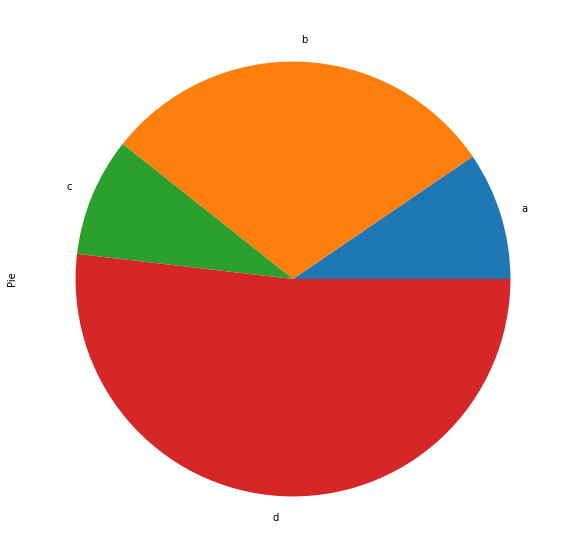

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


# df_dice = pd.DataFrame(np.random.randint(1,7,5000), columns=['Hist'])

# df_dice['Odds'] = df_dice['Hist'] + np.random.randint(1,7,5000)
# ax = df_dice.plot.hist(bins=12,alpha=0.5)

# df_15 = pd.DataFrame(np.random.randn(1000, 3), 
#                   index=pd.date_range('11/15/2017', periods=1000), 
#                   columns=list('ABC'))

# df_15 = df_15.cumsum()
# # df_15.plot()

# pd.DataFrame(np.random.randn(5)).plot.bar()

# vals = list('ABCD')
# df_15 = pd.DataFrame(np.random.rand(10,4), columns=vals)
# df_15.plot.bar()

# x_rng = range(1,15)
# y_vals = [1,5,4,7,6,9,5,7,20,25,20,23,9,8]

# plt.fill_between(x_rng,y_vals, color="skyblue", alpha=0.5)
# plt.show()

# pd.DataFrame(np.random.rand(10,3), columns=list('ABC')).plot.area()

# df_15 = pd.DataFrame(np.random.rand(50,4), columns=list('ABCD'))
# ax = df_15.plot.scatter(x='A', y='B', color='DarkBlue', label='Grp 1')
# df_15.plot.scatter(x='C', y='D', color='Orange', label='Grp 2', ax=ax)

pd.Series(np.random.rand(4), index=list('abcd'), name='Pie').plot.pie(figsize =(10,10))

In [16]:
import numpy as np
from sklearn.metrics import silhouette_score
import sklearn 
from sklearn.cluster import KMeans

# x = [1.12 ,1.45, 1.23]
# y = [2.4, 2.55, 5.33]

# x_np = np.array(x)
# y_np = np.array(y)

# X = list(map(lambda x,y:[x,y],x_np,y_np))
# print(np.array(X))



X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
silhouette_score = sklearn.metrics.silhouette_score(X, kmeans.labels_)
print(silhouette_score)
print(1)

0.7133477791749615
1
